# Forecast number of earthquakes per year

In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import yule_walker

from sklearn.metrics import r2_score

In [69]:
eq = pd.read_csv('/kaggle/input/earthquake-database/database.csv')
eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [70]:
eq.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [71]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [72]:
eq.iloc[2096,:]

Date                            09/24/1971
Time                              04:32:57
Latitude                           -16.554
Longitude                          -73.614
Type                            Earthquake
Depth                                 37.5
Depth Error                            NaN
Depth Seismic Stations                 NaN
Magnitude                              5.8
Magnitude Type                          MW
Magnitude Error                        NaN
Magnitude Seismic Stations             NaN
Azimuthal Gap                          NaN
Horizontal Distance                    NaN
Horizontal Error                       NaN
Root Mean Square                       NaN
ID                            ISCGEM780563
Source                              ISCGEM
Location Source                     ISCGEM
Magnitude Source                    ISCGEM
Status                           Automatic
Name: 2096, dtype: object

In [73]:
eq['year'] = pd.to_datetime(eq['Date'], format='%m/%d/%Y', errors='coerce')
eq['year'] = pd.to_datetime(eq['year']).dt.year

In [74]:
eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965.0


In [75]:
eq = eq[eq['Magnitude'] >=7]

In [76]:
earthquakes_per_year = eq.groupby('year').count()
earthquakes_per_year = earthquakes_per_year.iloc[1:-2,0]
earthquakes_per_year

year
1966.0     9
1967.0    11
1968.0    22
1969.0    14
1970.0    17
1971.0    20
1972.0    16
1973.0     9
1974.0    11
1975.0    13
1976.0    14
1977.0    10
1978.0    12
1979.0     8
1980.0     6
1981.0    11
1982.0     7
1983.0    14
1984.0    14
1985.0    15
1986.0    11
1987.0    13
1988.0    11
1989.0     8
1990.0    18
1991.0    17
1992.0    13
1993.0    12
1994.0    13
1995.0    20
1996.0    15
1997.0    16
1998.0    12
1999.0    18
2000.0    15
2001.0    16
2002.0    13
2003.0    15
2004.0    16
2005.0    11
2006.0    11
2007.0    18
2008.0    12
2009.0    17
2010.0    24
2011.0    20
2012.0    16
2013.0    19
2014.0    12
Name: Date, dtype: int64

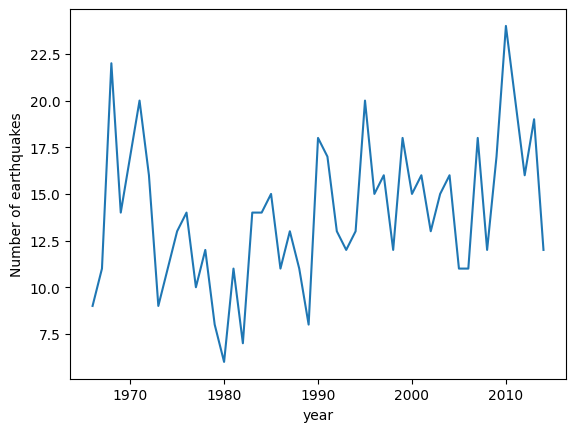

<Figure size 2400x1200 with 0 Axes>

In [105]:
ax = earthquakes_per_year.plot()
figure(figsize=(12, 6), dpi=200)

ax.set_ylabel("Number of earthquakes")
plt.show()

In [78]:
shifts = pd.DataFrame({
    'this year': earthquakes_per_year,
    'past year': earthquakes_per_year.shift(1)
    
})

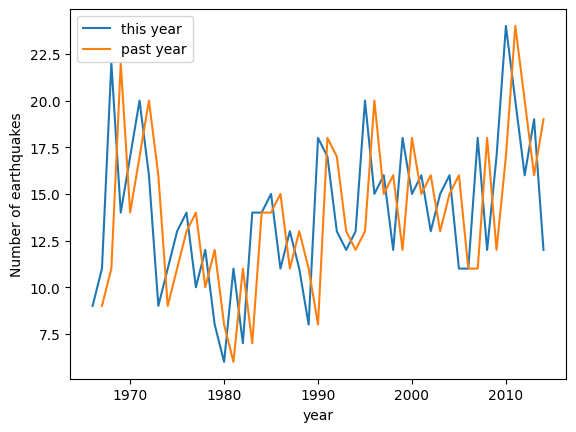

In [79]:
ax = shifts.plot()
ax.set_ylabel("Number of earthquakes")
plt.show()

In [80]:
shifts = shifts.dropna()

In [81]:
shifts.corr()

,this year,past year
this year,1.000000,0.313667
past year,0.313667,1.000000


### Test for stationarity : Augumented Dickey Fuller Test

In [82]:
result = adfuller(earthquakes_per_year.dropna())
print(result)

(-5.008806133844327, 2.1319566272140453e-05, 0, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 202.7529751691226)


In [83]:
pvalue = result[1]
print(pvalue)
if pvalue < 0.05:
    print("Stationary")
else:
    print("Non Stationary")

2.1319566272140453e-05
Stationary


### Difference the data

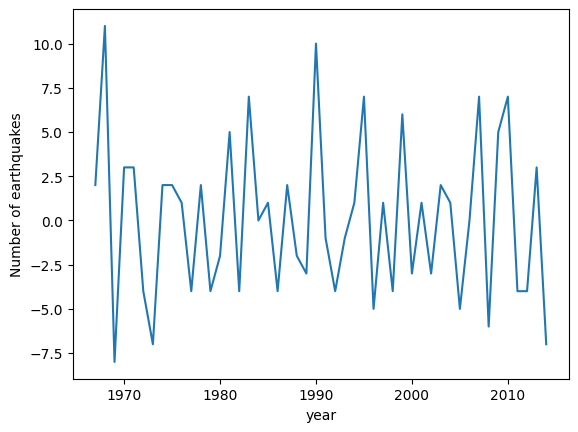

<Figure size 2400x1200 with 0 Axes>

In [104]:
differenced_data = earthquakes_per_year.diff().dropna()
ax = differenced_data.plot()
figure(figsize=(12, 6), dpi=200)

ax.set_ylabel("Number of earthquakes")
plt.show()

In [85]:
shifts = pd.DataFrame({
    'this year': differenced_data,
    'past year': differenced_data.shift(1)
    
})

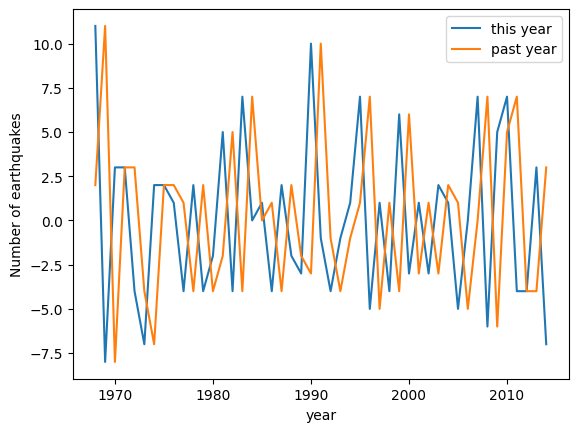

<Figure size 2400x1200 with 0 Axes>

In [103]:
ax = shifts.plot()
figure(figsize=(12, 6), dpi=200)
ax.set_ylabel("Number of earthquakes")
plt.show()

In [87]:
shifts = shifts.dropna()

In [88]:
shifts.corr()

,this year,past year
this year,1.000000,-0.376859
past year,-0.376859,1.000000


### Plot Autocorrelation and Partial Autocorrelation plots

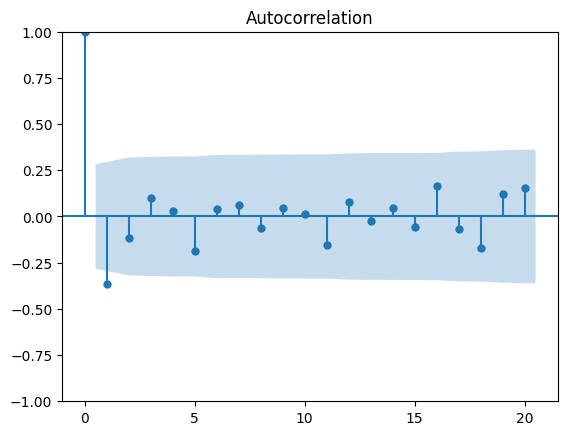

In [89]:
plot_acf(differenced_data, lags=20)
plt.show()

<Figure size 2400x1200 with 0 Axes>

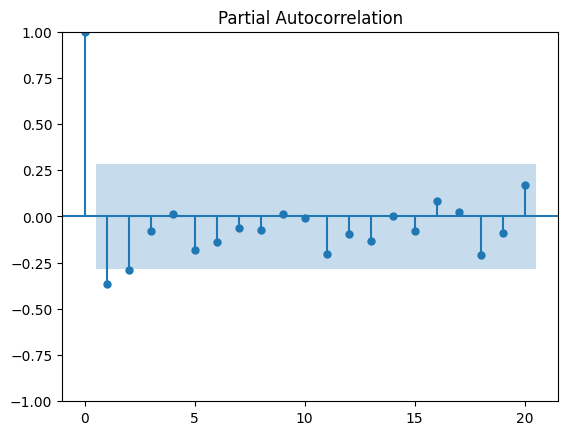

In [100]:
figure(figsize=(12, 6), dpi=200)

plot_pacf(differenced_data, lags=20)
plt.show()

### Estimate coefficients

In [91]:
coefficients, sigma = yule_walker(differenced_data,order=3)
print('coefficients:', -coefficients)
print('sigma:', sigma)

coefficients: [0.51636104 0.34981679 0.08922855]
sigma: 3.99051873543974


### Make a forecast with AR coefficients

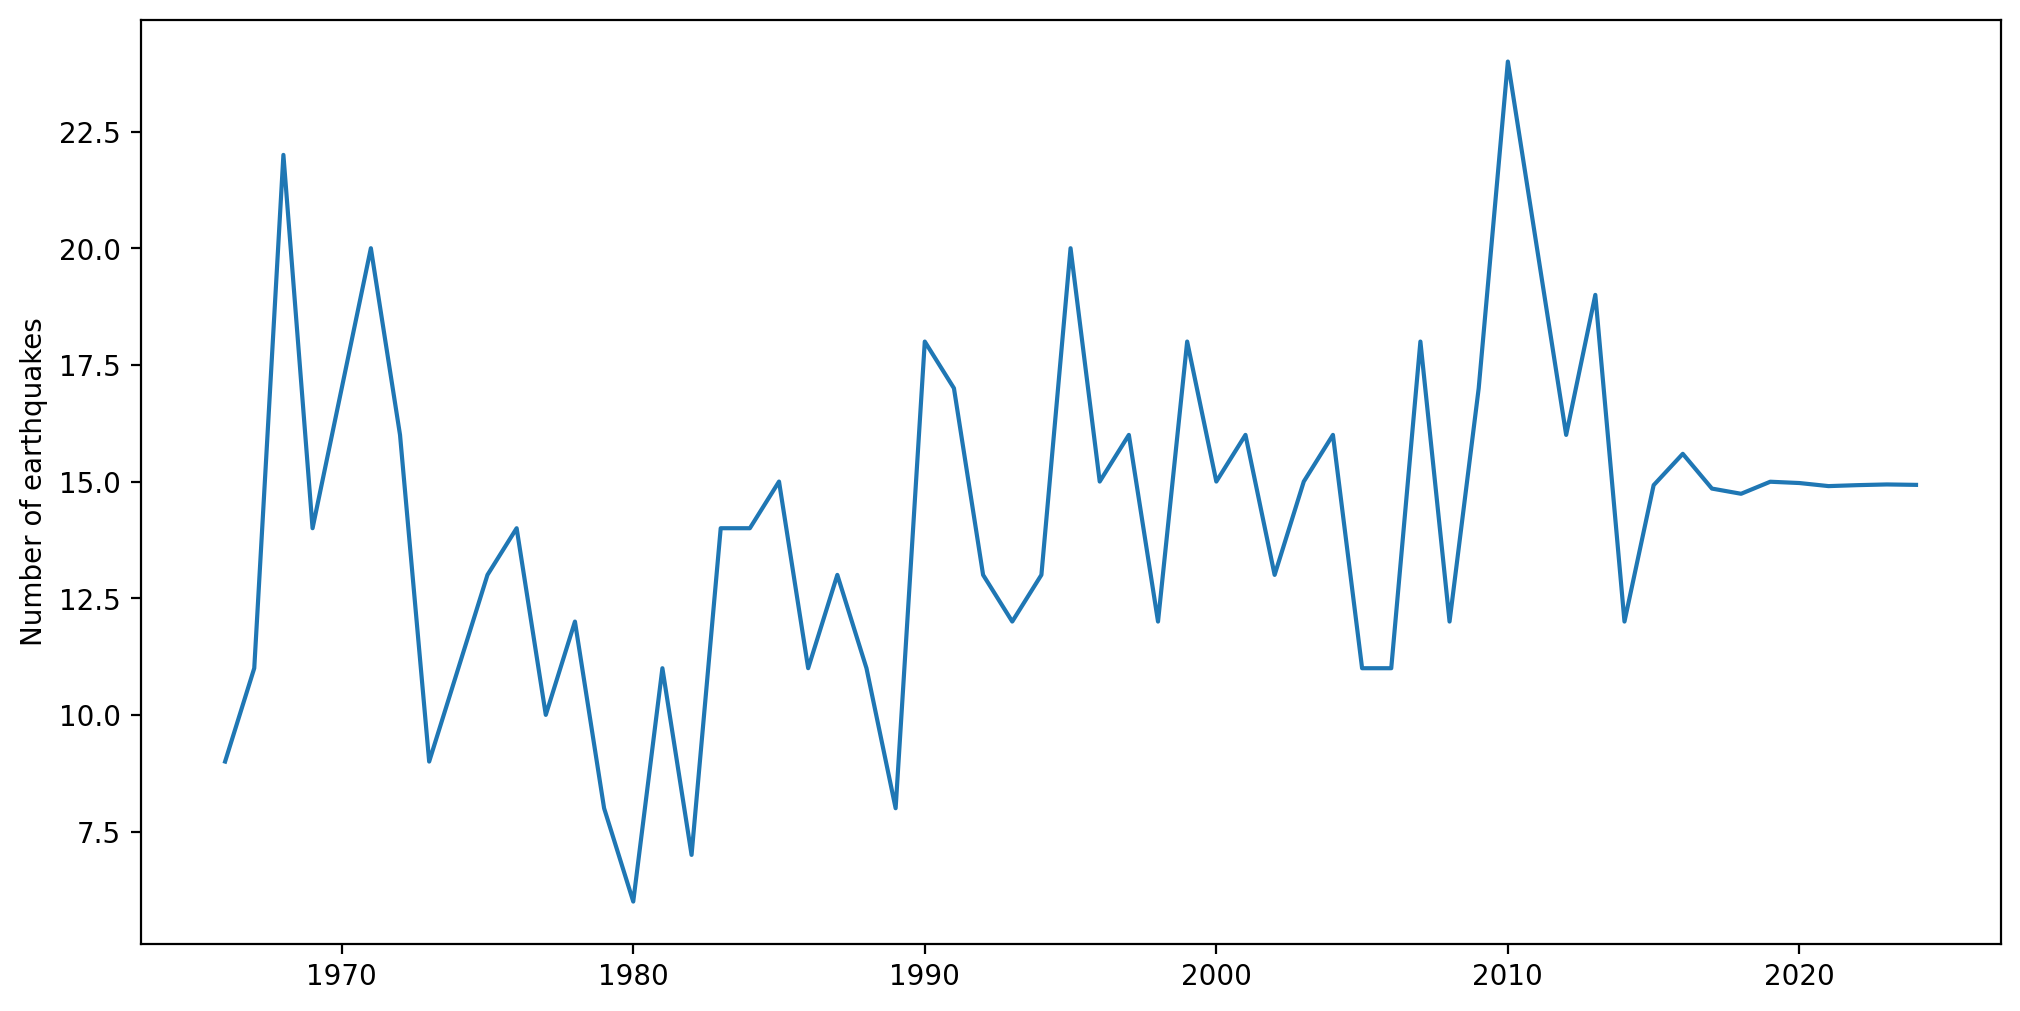

In [99]:
coefficients, sigma = yule_walker(differenced_data,order=3)

val_list = list(differenced_data)
val_list.reverse()

n_steps =10

for i in range(n_steps):
    new_val =0 
    for j in range(len(coefficients)):
        new_val+= coefficients[j] * val_list[j]
    val_list.insert(0,new_val)
val_list.reverse()
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

figure(figsize=(12, 6), dpi=200)

plt.plot(range(1966,2025),new_val_list)
plt.ylabel("Number of earthquakes")
plt.show()

Test R2: -0.02058577039276921


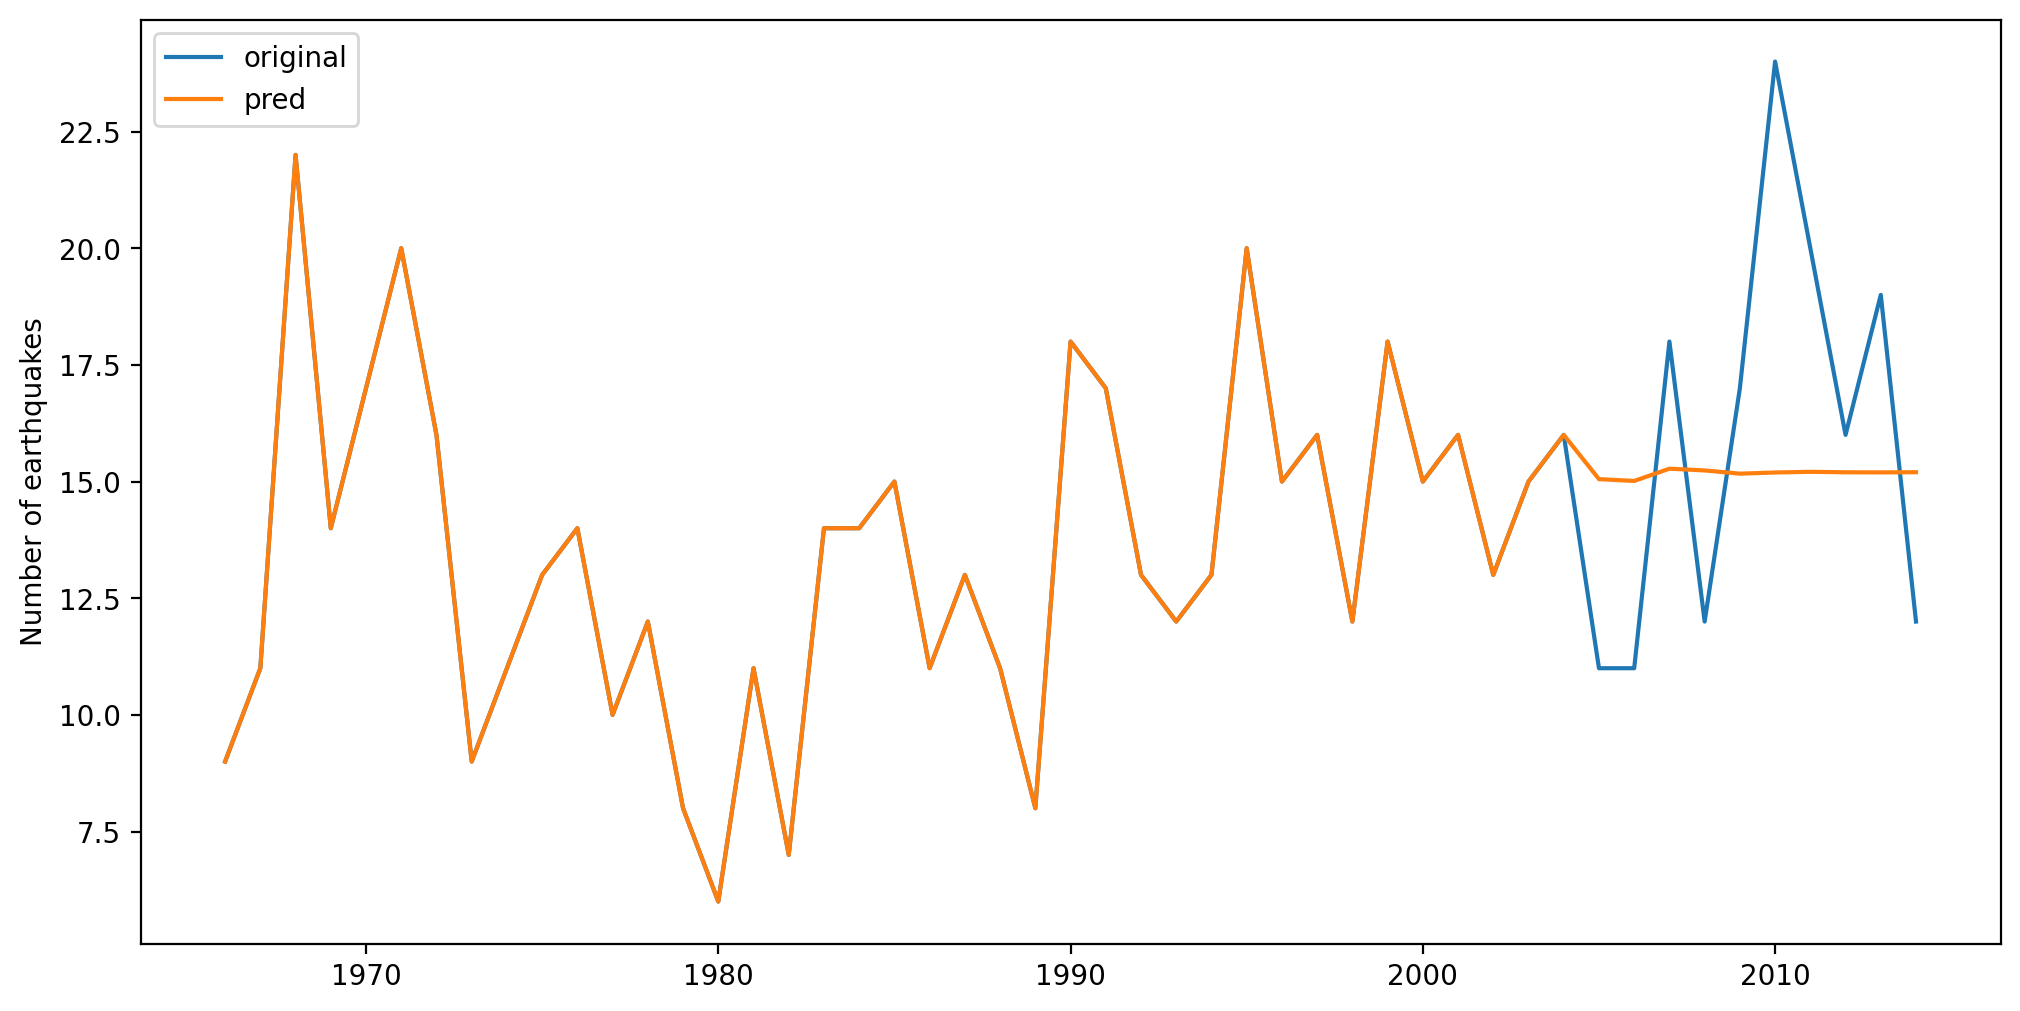

In [115]:
train = list(differenced_data)[:-10]
test = list(earthquakes_per_year)[-10:]

coefficients, sigma = yule_walker(differenced_data,order=3)

val_list = list(train)
val_list.reverse()

n_steps =10

for i in range(n_steps):
    new_val =0 
    for j in range(len(coefficients)):
        new_val+= coefficients[j] * val_list[j]
    val_list.insert(0,new_val)
val_list.reverse()

val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list
})

print('Test R2:', r2_score(validation.iloc[-10:,0],validation.iloc[-10:,1]))

figure(figsize=(12, 6), dpi=200)
plt.plot(range(1966,2015),validation)
plt.legend(validation.columns)
plt.ylabel("Number of earthquakes")
plt.show()

### Use grid search to find an optimal value of the order for a better R2

In [118]:
def evaluate_ord(order):
    train = list(differenced_data)[:-10]
    test = list(earthquakes_per_year)[-10:]

    coefficients, sigma = yule_walker(differenced_data,order=3)

    val_list = list(train)
    val_list.reverse()

    n_steps =10

    for i in range(n_steps):
        new_val =0 
        for j in range(len(coefficients)):
            new_val+= coefficients[j] * val_list[j]
        val_list.insert(0,new_val)
    val_list.reverse()

    val_list = [earthquakes_per_year.values[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()

    validation = pd.DataFrame({
        'original': earthquakes_per_year.reset_index(drop=True),
        'pred': new_val_list
    })
    
    return r2_score(validation.iloc[-10:,0],validation.iloc[-10:,1])


orders = []
r2scores = []
for order in range(1,31):
    orders.append(order)
    r2scores.append(evaluate_ord(order))
    results = pd.DataFrame({
        'orders': orders,
        'scores': r2scores
    })

    
results[results['scores']==results.max()['scores']]  
#print(results)

,orders,scores
0,1,-0.020586
1,2,-0.020586
2,3,-0.020586
3,4,-0.020586
4,5,-0.020586
5,6,-0.020586
6,7,-0.020586
7,8,-0.020586
8,9,-0.020586
9,10,-0.020586


Test R2: -0.07360099752422178


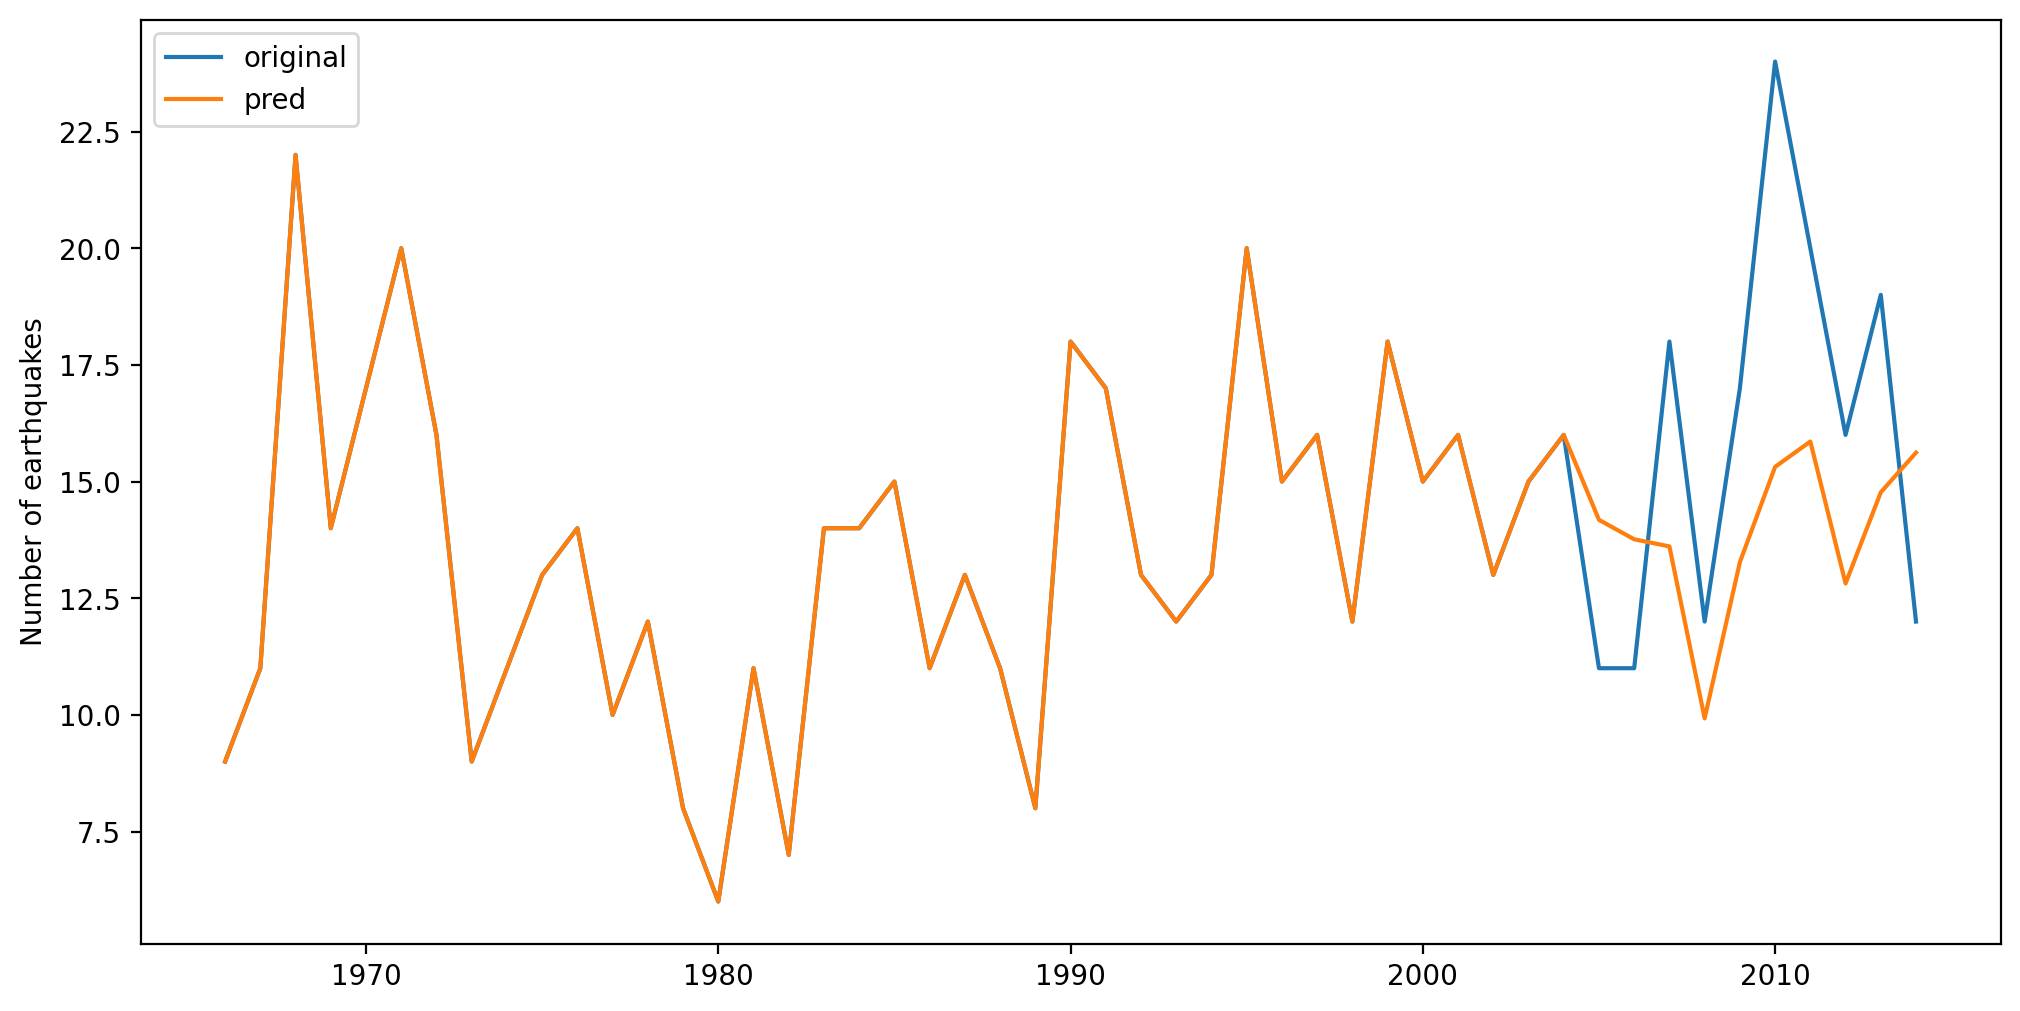

In [119]:
train = list(differenced_data)[:-10]
test = list(earthquakes_per_year)[-10:]

coefficients, sigma = yule_walker(differenced_data,order=19)

val_list = list(train)
val_list.reverse()

n_steps =10

for i in range(n_steps):
    new_val =0 
    for j in range(len(coefficients)):
        new_val+= coefficients[j] * val_list[j]
    val_list.insert(0,new_val)
val_list.reverse()

val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list
})

print('Test R2:', r2_score(validation.iloc[-10:,0],validation.iloc[-10:,1]))

figure(figsize=(12, 6), dpi=200)
plt.plot(range(1966,2015),validation)
plt.legend(validation.columns)
plt.ylabel("Number of earthquakes")
plt.show()